# AI hub 지능형 스마트팜 통합 데이터(토마토)

- https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100

# ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten,Input, concatenate
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
import tensorflow.keras.utils as utils

from datetime import datetime
# import cv2
import glob
import zipfile
import os
import shutil

from tensorflow.keras.applications import Xception, ResNet50
from tensorflow.keras.applications import InceptionV3, MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

import matplotlib as mlp
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc('font', family = font_name)
mlp.rcParams['axes.unicode_minus'] = False

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR

from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.metrics import mean_squared_error, r2_score

# 1. DATA 준비

## tomato 이미지 라벨링 json -> df
## bb정보 제외한 모든 데이터 csv

In [4]:
df_0 = pd.read_csv("C:/juna27/PythonWork/AI/data/tomato_label/tomato_df/tomato_final_df.csv", encoding="utf-8")
df_0

,imagePath,imageHeight,imageWidth,fileVersion,farmId,week,number,type,flowerCluster,date,...,numberOfLeaves,leafLength,leafWidth,floweringNode,numberOfTheFlower,numberOfTheFlowerPerTruss,numberOfFruitPerPlant,numberOfFruitPerTruss,fruitingNode,numberOfTheFlowerFullyDeveloped
0,V001_tom1_39_001_a1_00_20210930_14_00134902_49...,1920,1080,V001,tom1,39,1,a1,0,20210930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V001_tom1_39_006_a1_00_20210930_14_00130645_49...,1920,1080,V001,tom1,39,6,a1,0,20210930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,V001_tom1_39_010_a1_00_20210930_14_00124109_49...,1920,1080,V001,tom1,39,10,a1,0,20210930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,V001_tom1_39_011_a1_00_20210930_14_00122602_49...,1920,1080,V001,tom1,39,11,a1,0,20210930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,V001_tom1_39_011_a1_00_20210930_14_00124155_49...,1920,1080,V001,tom1,39,11,a1,0,20210930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146365,V001_tom6_48_026_f_09_20211202_13_00100240_376...,1920,1080,V001,tom6,48,26,f,9,20211202,...,NaN,NaN,NaN,9.0,1.0,9.0,NaN,NaN,NaN,1.0
146366,V001_tom6_48_026_f_09_20211202_13_01100240_376...,1920,1080,V001,tom6,48,26,f,9,20211202,...,NaN,NaN,NaN,9.0,1.0,9.0,NaN,NaN,NaN,1.0
146367,V001_tom6_48_027_f_07_20211202_13_00144857_376...,1920,1080,V001,tom6,48,27,f,7,20211202,...,NaN,NaN,NaN,7.0,1.0,7.0,NaN,NaN,NaN,1.0
146368,V001_tom6_48_027_f_07_20211202_13_01144857_376...,1920,1080,V001,tom6,48,27,f,7,20211202,...,NaN,NaN,NaN,7.0,1.0,7.0,NaN,NaN,NaN,1.0


In [5]:
df_0.columns

Index(['imagePath', 'imageHeight', 'imageWidth', 'fileVersion', 'farmId',
       'week', 'number', 'type', 'flowerCluster', 'date', 'plantHeight',
       'weeklyGrowth', 'heightOfTheFlowerTruss', 'stemDiameter',
       'numberOfLeaves', 'leafLength', 'leafWidth', 'floweringNode',
       'numberOfTheFlower', 'numberOfTheFlowerPerTruss',
       'numberOfFruitPerPlant', 'numberOfFruitPerTruss', 'fruitingNode',
       'numberOfTheFlowerFullyDeveloped'],
      dtype='object')

In [6]:
# df_0[["farmId", "number","date", "plantHeight", "weeklyGrowth"]]
# df_0

In [7]:
a1 = df_0[df_0["type"] == "a1"][["farmId", "number","date", "plantHeight", "weeklyGrowth"]]
a2 = df_0[df_0["type"] == "a2"][["farmId", "number","date", "heightOfTheFlowerTruss"]]
a3 = df_0[df_0["type"] == "a3"][["farmId", "number","date", "stemDiameter"]]

In [8]:
a2_df = a2.copy()

In [9]:
a2_df.isnull().sum()

farmId                      0
number                      0
date                        0
heightOfTheFlowerTruss    328
dtype: int64

# 2. a2 성장 정보 결측치 처리

## median OR mean

In [10]:
# NULL => 중간값 OR 평균
a2_df = a2_df.fillna(a2_df["heightOfTheFlowerTruss"].median())

# a2_df = a2_df.fillna(a2_df["plantHeights"].mean())

In [11]:
a2_df_0 = a2_df.copy()

# 3. 날짜 데이터 Y, M, D로 분할

## 기존 date 삭제

In [12]:
a2_df['year'] = a2_df['date'] // 10000
a2_df['month'] = (a2_df['date'] % 10000) // 100
a2_df['day'] = a2_df['date'] % 100

# 'date' 컬럼 삭제
a2_df.drop('date', axis=1, inplace=True)

a2_df

,farmId,number,heightOfTheFlowerTruss,year,month,day
17500,tom1,52,27.500,2022,1,1
17501,tom1,55,46.690,2022,1,1
17502,tom1,56,49.630,2022,1,1
17503,tom1,57,28.670,2022,1,1
17504,tom1,58,36.500,2022,1,1
...,...,...,...,...,...,...
20995,tom4,74,17.910,2021,9,25
20996,tom4,75,13.505,2021,9,19
20997,tom4,75,13.505,2021,9,25
20998,tom4,75,20.110,2021,9,25


In [13]:
a2_df.head(4)

,farmId,number,heightOfTheFlowerTruss,year,month,day
17500,tom1,52,27.50,2022,1,1
17501,tom1,55,46.69,2022,1,1
17502,tom1,56,49.63,2022,1,1
17503,tom1,57,28.67,2022,1,1


In [14]:
# 컬럼의 위치 변경
# farmId byebye
new_order = ["number", "year", "month", "day", "heightOfTheFlowerTruss"]
a2_df = a2_df.reindex(columns=new_order)
a2_df.head(4)

,number,year,month,day,heightOfTheFlowerTruss
17500,52,2022,1,1,27.50
17501,55,2022,1,1,46.69
17502,56,2022,1,1,49.63
17503,57,2022,1,1,28.67


In [15]:
a2_df['YMD'] = a2_df['year'].astype(str) + a2_df['month'].astype(str).str.zfill(2) + a2_df['day'].astype(str).str.zfill(2)

# 기준 날짜
standard_date = datetime(2021, 9, 1)

# 기준날짜에서 며칠이 지났는지 계산하고 passdays 추가 
a2_df['passdays'] = (pd.to_datetime(a2_df['YMD'], format='%Y%m%d') - standard_date).dt.days

# 결과 출력
a2_df.head(4)

,number,year,month,day,heightOfTheFlowerTruss,YMD,passdays
17500,52,2022,1,1,27.50,20220101,122
17501,55,2022,1,1,46.69,20220101,122
17502,56,2022,1,1,49.63,20220101,122
17503,57,2022,1,1,28.67,20220101,122


# 4. 날짜 데이터 passdays로 통합

## copy 후 새 변수

In [130]:
a2_df_days = a2_df.copy()
del a2_df_days["year"]
del a2_df_days["month"]
del a2_df_days["day"]
del a2_df_days["YMD"]
# del a2_df_days["number"]

a2_df_days = a2_df_days.sort_values("passdays")

In [131]:
# 모델 반복 실행을 위해 변수 복사해서 사용
a2_df_days
a2_df_days_0 = a2_df_days.copy()

In [132]:
a2_df_days

,number,heightOfTheFlowerTruss,passdays
18962,1,26.37,7
17539,74,38.09,7
17540,75,19.54,7
17541,76,17.84,7
17542,77,28.99,7
...,...,...,...
18951,68,8.78,130
18950,66,11.08,130
18949,60,8.74,130
18947,52,9.81,130


# 5. 데이터 정규화

### 정규화 O MinMax

In [64]:
# Minmaxscaler 정규화 0~1
scaler = MinMaxScaler()
X = pd.DataFrame()
y = pd.DataFrame()

X["passdays"] = scaler.fit_transform(a2_df_days[["passdays"]]).flatten()
y["heightOfTheFlowerTruss"] = scaler.fit_transform(a2_df_days[["heightOfTheFlowerTruss"]]).flatten()

### 정규화 O Standard

In [24]:
# from sklearn.preprocessing import StandardScaler

# # StandardScaler 정규화 평균 0 , 표준편차 1
# scaler = StandardScaler()
# X = pd.DataFrame()
# y = pd.DataFrame()

# X["passdays"] = scaler.fit_transform(a2_df_days[["passdays"]]).flatten()
# y["heightOfTheFlowerTruss"] = scaler.fit_transform(a2_df_days[["heightOfTheFlowerTruss"]]).flatten()

### 정규화 X

In [25]:
# X = a2_df_days["passdays"]
# y = a2_df_days["heightOfTheFlowerTruss"]

### 차원 변환

In [153]:
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1)
print(X.shape, y.shape)

(3500, 1) (3500,)


### train_test_split

In [154]:
TEST_RATIO = 0.2
RAND_STATE = 42

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=TEST_RATIO,
                                                    random_state=RAND_STATE)

### model

In [156]:
# 선형 회귀 LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("-"*50)
print("Linear Regression")

print("MES :", mse)
print('RMSE :', rmse)
print("R2-Score:", r2)
print("-"*50)

--------------------------------------------------
Linear Regression
MES : 121.21624835552706
RMSE : 11.00982508287607
R2-Score: -0.0005578993090660234
--------------------------------------------------


In [157]:
# 릿지 회귀
model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("-"*50)
print("Ridge Regression")

print("MES :", mse)
print('RMSE :', rmse)
print("R2-Score:", r2)
print("-"*50)

--------------------------------------------------
Ridge Regression
MES : 121.21624834649418
RMSE : 11.00982508246585
R2-Score: -0.0005578992345058875
--------------------------------------------------


In [158]:
# 라쏘 회귀
model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("-"*50)
print("Lasso Regression")
print("MSE:", mse)
print('RMSE :', rmse)
print("R2-Score:", r2)
print("-"*50)

--------------------------------------------------
Lasso Regression
MSE: 121.19628019392856
RMSE : 11.008918211792135
R2-Score: -0.0003930756811028058
--------------------------------------------------


In [159]:
# 의사결정 나무 회귀
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("-"*50)
print("Decision Tree Regression")

print("MSE:", mse)
print('RMSE :', rmse)
print("R2-Score:", r2)
print("-"*50)

--------------------------------------------------
Decision Tree Regression
MSE: 125.66815863216554
RMSE : 11.210181025842783
R2-Score: -0.03730539854894599
--------------------------------------------------


In [160]:
# 랜덤 포레스트 회귀
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("-"*50)
print("Random Forest Regression")

print("MSE:", mse)
print('RMSE :', rmse)
print("R2-Score:", r2)
print("-"*50)

--------------------------------------------------
Random Forest Regression
MSE: 126.08140822220348
RMSE : 11.22859778521804
R2-Score: -0.04071649357381402
--------------------------------------------------


In [161]:
from sklearn.ensemble import VotingRegressor

In [162]:
deci_model = DecisionTreeRegressor(random_state=42)
rnf_model = RandomForestRegressor(random_state=42)
svm_model = LinearSVR(random_state=42)
knn_model = KNeighborsRegressor()
lin_model = LinearRegression()

voting_hard = VotingRegressor(estimators=[('dt', deci_model), ('rf', rnf_model), ('svr', svm_model), ('knn', knn_model)])
voting_hard.fit(X_train, y_train)

print("훈련 :", voting_hard.score(X_train, y_train))
print("테스트 :", voting_hard.score(X_test, y_test))

훈련 : 0.008739463323426677
테스트 : -0.03698212219961494


C:\Users\jhhwa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [163]:
X = a2_df_days_0.copy()
X

,number,heightOfTheFlowerTruss,passdays
18962,1,26.37,7
17539,74,38.09,7
17540,75,19.54,7
17541,76,17.84,7
17542,77,28.99,7
...,...,...,...
18951,68,8.78,130
18950,66,11.08,130
18949,60,8.74,130
18947,52,9.81,130


## 군집 시각화

- 성장 단계 분류를 위해 데이터 분포 확인

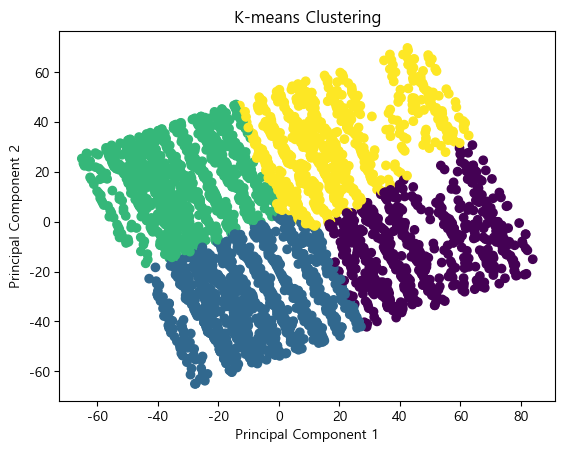

In [164]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 군집화를 위한 K-means 모델 생성 및 학습
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# PCA를 사용하여 데이터를 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 각 데이터 포인트의 군집 레이블
labels = kmeans.labels_

# 군집화 결과 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.show()


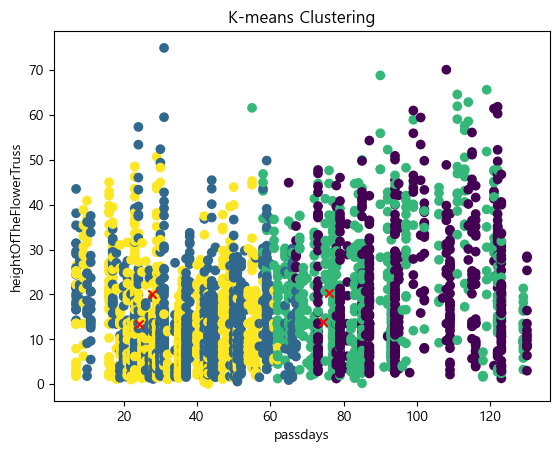

In [165]:
from sklearn.cluster import KMeans

k = 4  # 군집의 개수
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

labels = kmeans.labels_  # 각 데이터 포인트의 군집 레이블
centroids = kmeans.cluster_centers_  # 각 군집의 중심점

import matplotlib.pyplot as plt

# 데이터 포인트와 군집 중심점의 좌표
x = X['passdays'].values
y = X['heightOfTheFlowerTruss'].values

# 데이터 포인트를 군집별로 색상으로 구분하여 플롯
plt.scatter(x, y, c=labels, cmap='viridis')

# 군집 중심점 표시
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red')

plt.xlabel('passdays')
plt.ylabel('heightOfTheFlowerTruss')
plt.title('K-means Clustering')

plt.show()